This notebook a overview of some computational problems, this will help for later when I do the Quantum Computation noyebook.

First thing in this note book is to describe and plot five examples of pairs of functions  and  such that  is .
Here is the first code for the line graph.

Graph 1
f(n) = n and g(n) = n: We can see here, f(n) is simply a constant multiple of g(n), so f(n) is O(g(n)).

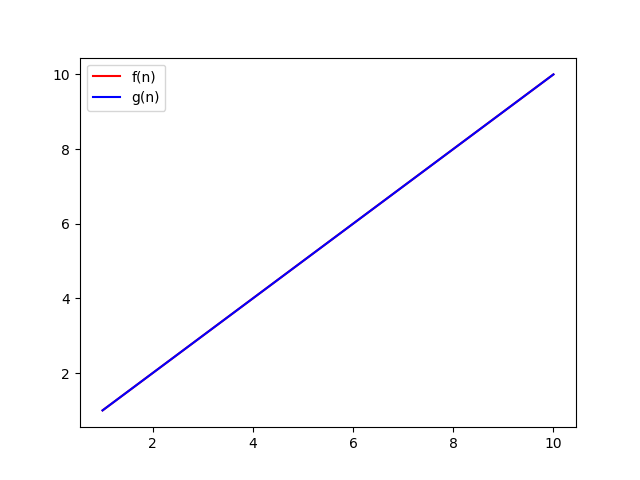

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def f(n):
  
  return n

def g(n):
    return n

n = np.linspace(1, 10, 100)
plt.plot(n, f(n), 'r', label='f(n)')
plt.plot(n, g(n), 'b', label='g(n)')
plt.legend(loc='upper left')
plt.show()

Graph 2
f(n) = n^2 and g(n) = n: We can see here, f(n) is O(g(n)) because f(n) grows at most as fast as g(n).

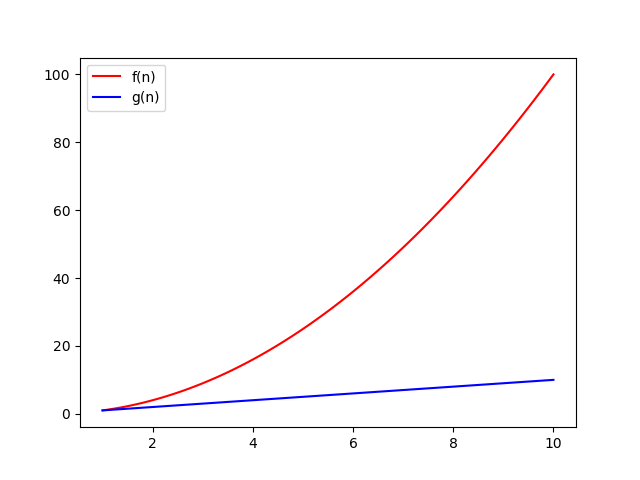

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(n):
    return n**2

def g(n):
    return n

n = np.linspace(1, 10, 100)
plt.plot(n, f(n), 'r', label='f(n)')
plt.plot(n, g(n), 'b', label='g(n)')
plt.legend(loc='upper left')
plt.show()


Graph 3
f(n) = n^3 and g(n) = n^2: We can see here, f(n) is O(g(n)) because f(n) grows at most as fast as g(n).


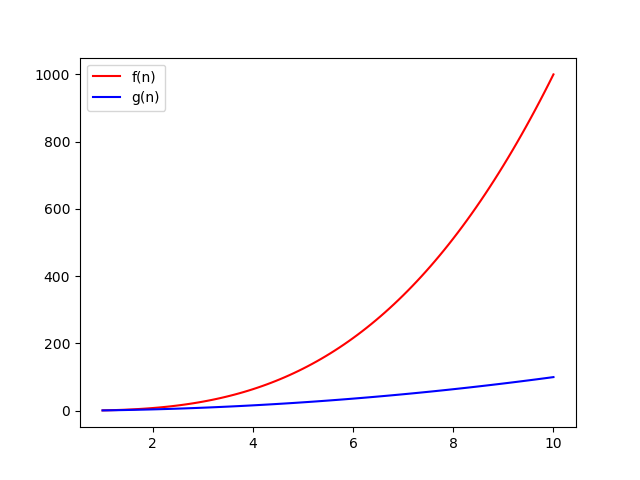

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def f(n):
    return n**3

def g(n):
    return n**2

n = np.linspace(1, 10, 100)
plt.plot(n, f(n), 'r', label='f(n)')
plt.plot(n, g(n), 'b', label='g(n)')
plt.legend(loc='upper left')
plt.show()


Graph 4
f(n) = n and g(n) = log(n): We can see here, f(n) is O(g(n)) because f(n) grows at most as fast as g(n).

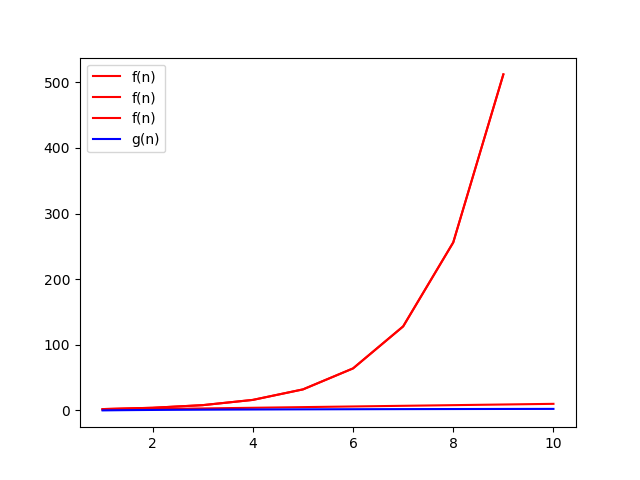

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def f(n):
    return n

def g(n):
    return np.log(n)

n = np.linspace(1, 10, 100)
plt.plot(n, f(n), 'r', label='f(n)')
plt.plot(n, g(n), 'b', label='g(n)')
plt.legend(loc='upper left')
plt.show()



I havent been able to figure out something for graph 5 yet.

simulation of a Turing machine using Python. very intersting, here to look over.

In [13]:
# State table.
table = {
    ('X', '_'): ['_', 'R', 'T'],
    ('X', '0'): ['0', 'R', 'X'],
    ('X', '1'): ['1', 'R', 'Y'],
    ('Y', '_'): ['_', 'R', 'F'],
    ('Y', '0'): ['0', 'R', 'Y'],
    ('Y', '1'): ['1', 'R', 'X'],
}

# Tape input.
tape = list('0101111')
# Position on tape.
pos = 0
# Initial state is first in table.
state = 'X'

# Keep going while we are not in a halting state.
while state not in ['T', 'F']:
    # Print the current status.
    print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
    # Get the row of the table.
    row = table[(state, tape[pos])]
    # Overwrite the symbol.
    tape[pos] = row[0]
    # Move left or right.
    if row[1] == 'R':
        # Put blanks on tape as necessary.
        if pos == len(tape) - 1:
            tape = tape + ['_']
        # Increase position.
        pos = pos + 1
    else:
        # Put blanks on tape as necessary.
        if pos == 0:
            tape = ['_'] + tape
            # The position on the tape has to move with it.
            pos = pos + 1
        # Decrease position.
        pos = pos - 1
    # Update the state.
    state = row[2]

# Print the current status.
print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))

X0101111
0X101111
01Y01111
010Y1111
0101X111
01011Y11
010111X1
0101111Y_
0101111_F_


Gonna look and find outer examples of this
Reading and examining this GitHub should be of use.
https://github.com/aropie/Turing-Machine-Simulator

In [14]:
class TuringMachine:
    def __init__(self, tape, initial_state, final_states, transitions):
        self.tape = list(tape)
        self.position = 0
        self.state = initial_state
        self.final_states = final_states
        self.transitions = transitions

    def step(self):
        symbol = self.tape[self.position]
        transition = self.transitions[self.state][symbol]
        self.tape[self.position] = transition[0]
        self.position += 1 if transition[1] == 'R' else -1
        self.state = transition[2]

    def run(self):
        while self.state not in self.final_states:
            self.step()

# Example usage
tape = '0001'
initial_state = 'q1'
final_states = ['q2']
transitions = {
    'q1': {'0': ('1', 'R', 'q1'), '1': ('0', 'L', 'q2')},
    'q2': {'0': ('0', 'L', 'q2'), '1': ('1', 'L', 'q2')},
}
tm = TuringMachine(tape, initial_state, final_states, transitions)
tm.run()
print(tm.tape)  # Outputs: '0010'

['1', '1', '1', '0']


Exercise 2
Change the first code example of Turing machine to only accept inputs that do not contain any 1's.

I can add a new state Z that is reached whenever a 1 is encountered on the tape.
Then I can add a transition from state Z to state F, whenever a 1 is encountered maybe.

In [1]:
# State table.
table = {
    ('X', '_'): ['_', 'R', 'T'],
    ('X', '0'): ['0', 'R', 'X'],
    ('X', '1'): ['1', 'R', 'Z'],
    ('Y', '_'): ['_', 'R', 'F'],
    ('Y', '0'): ['0', 'R', 'Y'],
    ('Y', '1'): ['1', 'R', 'X'],
    ('Z', '_'): ['_', 'R', 'F'],
    ('Z', '0'): ['0', 'R', 'Z'],
    ('Z', '1'): ['1', 'R', 'F'],
}

# Tape input.
tape = list('0101111')
# Position on tape.
pos = 0
# Initial state is first in table.
state = 'X'

# Keep going while we are not in a halting state.
while state not in ['T', 'F']:
    # Print the current status.
    print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
    # Get the row of the table.
    row = table[(state, tape[pos])]
    # Overwrite the symbol.
    tape[pos] = row[0]
    # Move left or right.
    if row[1] == 'R':
        # Put blanks on tape as necessary.
        if pos == len(tape) - 1:
            tape = tape + ['_']
        # Increase position.
        pos = pos + 1
    else:
        # Put blanks on tape as necessary.
        if pos == 0:
            tape = ['_'] + tape
            # The position on the tape has to move with it.
            pos = pos + 1
        # Decrease position.
        pos = pos - 1
    # Update the state.
    state = row[2]

# Print the current status.
print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))


X0101111
0X101111
01Z01111
010Z1111
0101F111


Look into the bellow.

Double-slit experiment

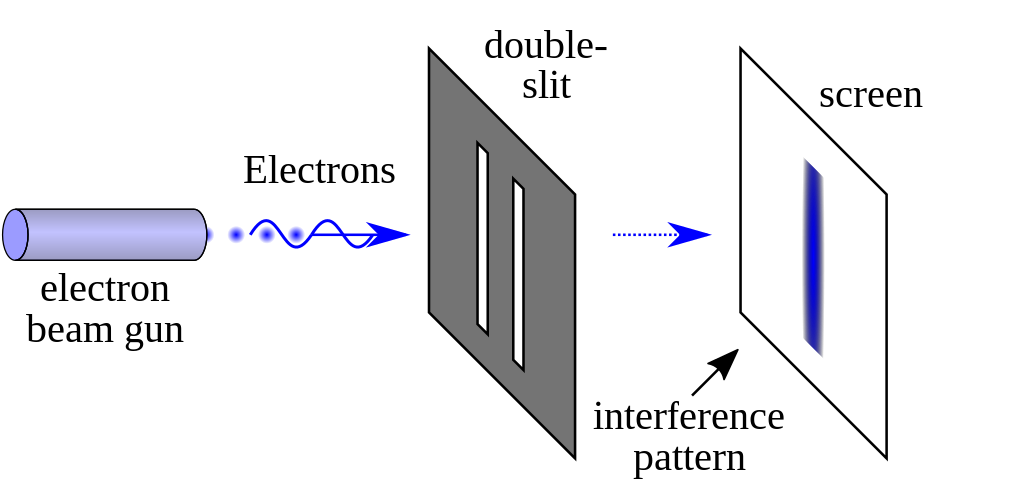!

Stern Gerlach

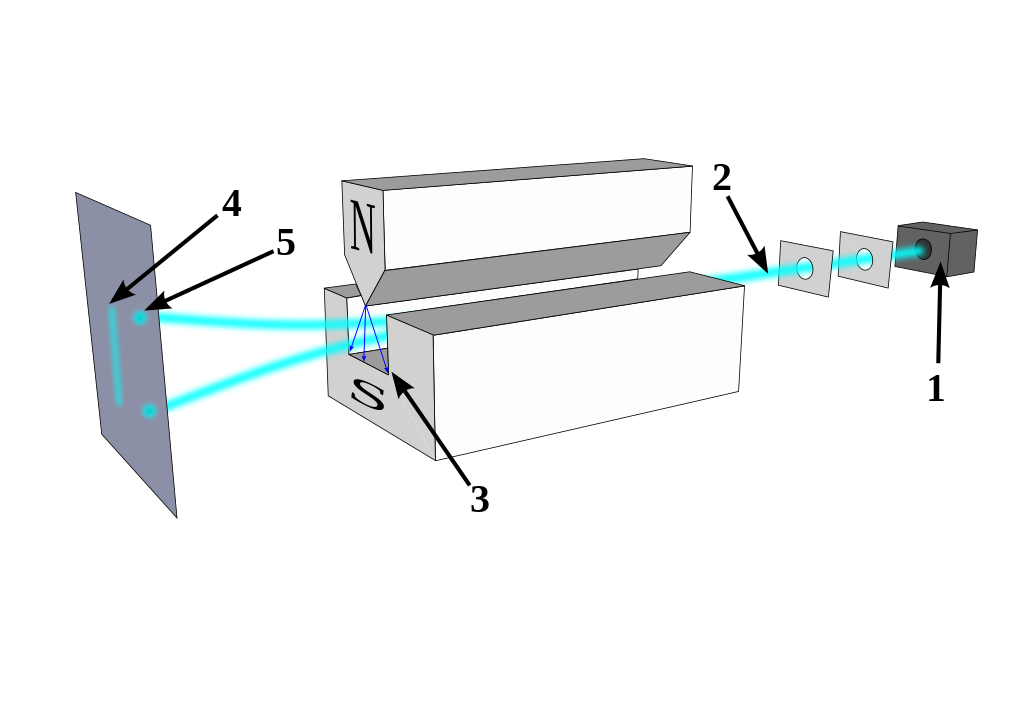!